In [1]:
import sys
print(f"Python version: {sys.version}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

✅ All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


In [2]:
nhs_df = pd.read_csv("National_Overview.csv")

In [3]:
nhs_df.shape

(52855, 8)

In [4]:
print(nhs_df.head(10))

  APPOINTMENT_MONTH APPT_STATUS HCP_TYPE     APPT_MODE  \
0           APR2024    Attended       GP  Face-to-Face   
1           APR2024    Attended       GP  Face-to-Face   
2           APR2024    Attended       GP  Face-to-Face   
3           APR2024    Attended       GP  Face-to-Face   
4           APR2024    Attended       GP  Face-to-Face   
5           APR2024    Attended       GP  Face-to-Face   
6           APR2024    Attended       GP  Face-to-Face   
7           APR2024    Attended       GP  Face-to-Face   
8           APR2024    Attended       GP  Face-to-Face   
9           APR2024    Attended       GP  Face-to-Face   

             SERVICE_SETTING            CONTEXT_TYPE  \
0  Extended Access Provision  Care Related Encounter   
1  Extended Access Provision  Care Related Encounter   
2  Extended Access Provision  Care Related Encounter   
3  Extended Access Provision  Care Related Encounter   
4  Extended Access Provision  Care Related Encounter   
5  Extended Access Provis

In [5]:
nhs_df.tail(5)

,APPOINTMENT_MONTH,APPT_STATUS,HCP_TYPE,APPT_MODE,SERVICE_SETTING,CONTEXT_TYPE,NATIONAL_CATEGORY,APPOINTMENTS
52850,SEP2025,Unknown,Unknown,Video Conference/Online,General Practice,Inconsistent Mapping,Inconsistent Mapping,8035
52851,SEP2025,Unknown,Unknown,Video Conference/Online,Other,Inconsistent Mapping,Inconsistent Mapping,4
52852,SEP2025,Unknown,Unknown,Video Conference/Online,Primary Care Network,Care Related Encounter,Clinical Triage,45
52853,SEP2025,Unknown,Unknown,Video Conference/Online,Primary Care Network,Care Related Encounter,Social Prescribing Service,80
52854,SEP2025,Unknown,Unknown,Video Conference/Online,Primary Care Network,Inconsistent Mapping,Inconsistent Mapping,815


In [6]:
nhs_df.columns

Index(['APPOINTMENT_MONTH', 'APPT_STATUS', 'HCP_TYPE', 'APPT_MODE',
       'SERVICE_SETTING', 'CONTEXT_TYPE', 'NATIONAL_CATEGORY', 'APPOINTMENTS'],
      dtype='object')

In [7]:
nhs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52855 entries, 0 to 52854
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   APPOINTMENT_MONTH  52855 non-null  object
 1   APPT_STATUS        52855 non-null  object
 2   HCP_TYPE           52855 non-null  object
 3   APPT_MODE          52855 non-null  object
 4   SERVICE_SETTING    52855 non-null  object
 5   CONTEXT_TYPE       52855 non-null  object
 6   NATIONAL_CATEGORY  52855 non-null  object
 7   APPOINTMENTS       52855 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


In [8]:
nhs_df.describe()

,APPOINTMENTS
count,5.285500e+04
mean,1.741479e+04
std,1.501037e+05
min,1.000000e+00
25%,1.600000e+01
50%,1.280000e+02
75%,1.148000e+03
max,4.504951e+06


In [9]:
nhs_df.isna().sum()

,0
APPOINTMENT_MONTH,0
APPT_STATUS,0
HCP_TYPE,0
APPT_MODE,0
SERVICE_SETTING,0
CONTEXT_TYPE,0
NATIONAL_CATEGORY,0
APPOINTMENTS,0


In [10]:
nhs_df.duplicated().sum()

np.int64(0)

In [11]:
nhs_df.nunique()

,0
APPOINTMENT_MONTH,30
APPT_STATUS,3
HCP_TYPE,3
APPT_MODE,5
SERVICE_SETTING,5
CONTEXT_TYPE,3
NATIONAL_CATEGORY,19
APPOINTMENTS,10414


In [12]:
nhs_df = nhs_df.rename(columns={
    "APPOINTMENT_MONTH":"appointment_month",
    "APPT_STATUS" : "appt_status",
    "HCP_TYPE" : "hcp_type",
    "APPT_MODE" : "appt_mode",
    "SERVICE_SETTING": "service_setting",
    "CONTEXT_TYPE" : "context_type",
    "NATIONAL_CATEGORY" : "national_category",
    "APPOINTMENTS" : "appointments"})

In [13]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments
0,APR2024,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10
1,APR2024,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293
2,APR2024,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096
3,APR2024,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098
4,APR2024,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854


In [14]:
nhs_df.groupby("appt_status")["appointments"].sum()

,appointments
appt_status,
Attended,825362167
DNA,40669022
Unknown,54427649


In [15]:
appt_appt_status = nhs_df[["appointments", "appt_status"]].groupby(by= "appt_status").sum("appointments")

In [16]:
appt_appt_status / sum(nhs_df["appointments"]) * 100

,appointments
appt_status,
Attended,89.668558
DNA,4.418342
Unknown,5.913100


In [17]:
nhs_df = nhs_df[(nhs_df["appt_status"] == "Attended") | (nhs_df["appt_status"] == "DNA")]

In [18]:
nhs_df["appt_status"].unique()

array(['Attended', 'DNA'], dtype=object)

In [19]:
nhs_df.shape

(33574, 8)

In [20]:
print(f"Rows: {nhs_df.shape[0]:,}")
print(f"Total appointments: {nhs_df['appointments'].sum():,}")

Rows: 33,574
Total appointments: 866,031,189


In [21]:
print(nhs_df.columns.tolist())

['appointment_month', 'appt_status', 'hcp_type', 'appt_mode', 'service_setting', 'context_type', 'national_category', 'appointments']


In [22]:
# change appointment_month to date time
nhs_df["appointment_month"] = pd.to_datetime(nhs_df["appointment_month"], format = "%b%Y")

In [23]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854


In [24]:
nhs_df["appointment_month"]= nhs_df["appointment_month"].dt.strftime("%Y-%m")

In [25]:
nhs_df["appointment_month"] = pd.to_datetime(nhs_df["appointment_month"])

In [26]:
print(nhs_df["appointment_month"].dtype)

datetime64[ns]


In [27]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854


In [28]:
def count_duplicate(nhs_df):
  duplicate = nhs_df.duplicated().sum()
  return f"the number of duplicate is {duplicate}"


count_duplicate(nhs_df)

'the number of duplicate is 0'

In [29]:
nhs_df["day_of_week"] = nhs_df["appointment_month"].apply(lambda x: x.day_name())

In [30]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments,day_of_week
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10,Monday
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293,Monday
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096,Monday
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098,Monday
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854,Monday


In [31]:
nhs_df["appointment_month"].dt.year.unique()

array([2024, 2025, 2023], dtype=int32)

In [32]:
print(nhs_df.columns.tolist())

['appointment_month', 'appt_status', 'hcp_type', 'appt_mode', 'service_setting', 'context_type', 'national_category', 'appointments', 'day_of_week']


In [33]:
print(nhs_df.shape)

(33574, 9)


In [34]:
print(nhs_df.head())

  appointment_month appt_status hcp_type     appt_mode  \
0        2024-04-01    Attended       GP  Face-to-Face   
1        2024-04-01    Attended       GP  Face-to-Face   
2        2024-04-01    Attended       GP  Face-to-Face   
3        2024-04-01    Attended       GP  Face-to-Face   
4        2024-04-01    Attended       GP  Face-to-Face   

             service_setting            context_type  \
0  Extended Access Provision  Care Related Encounter   
1  Extended Access Provision  Care Related Encounter   
2  Extended Access Provision  Care Related Encounter   
3  Extended Access Provision  Care Related Encounter   
4  Extended Access Provision  Care Related Encounter   

                                   national_category  appointments day_of_week  
0  Care Home Needs Assessment & Personalised Care...            10      Monday  
1                                    Care Home Visit           293      Monday  
2  Care Related Encounter but does not fit into a...          1096     

In [35]:
def get_season(x):
  if x in [12, 1, 2]:
    return "winter"
  elif x in [3, 4, 5]:
    return "Spring"
  elif x in [6,7,8]:
    return "Summer"
  else:
    return "Autumn"


nhs_df["season"] = nhs_df["appointment_month"].dt.month.apply(get_season)

In [36]:
nhs_df["season"].value_counts()

,count
season,
Autumn,10145
Summer,9926
winter,6799
Spring,6704


In [37]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments,day_of_week,season
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10,Monday,Spring
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293,Monday,Spring
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096,Monday,Spring
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098,Monday,Spring
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854,Monday,Spring


In [38]:
# calculate total number of monthly appointments

monthly_appointment = nhs_df.groupby("appointment_month")["appointments"].sum()
monthly_appointment.reset_index()

,appointment_month,appointments
0,2023-06-01,27890851
1,2023-07-01,26346475
2,2023-08-01,26758935
3,2023-09-01,29178007
4,2023-10-01,31979288
5,2023-11-01,29704247
6,2023-12-01,24317164
7,2024-01-01,30624783
8,2024-02-01,28781005
9,2024-03-01,27833148


In [39]:
dna_appointments = nhs_df[nhs_df["appt_status"]=="DNA"].groupby("appointment_month")["appointments"].sum()

In [40]:
dna_appointments.reset_index()

,appointment_month,appointments
0,2023-06-01,1309910
1,2023-07-01,1227296
2,2023-08-01,1231789
3,2023-09-01,1592841
4,2023-10-01,1775540
5,2023-11-01,1460781
6,2023-12-01,1180511
7,2024-01-01,1351383
8,2024-02-01,1289537
9,2024-03-01,1246223


In [41]:
monthly_rate = (dna_appointments/monthly_appointment).mul(100)
monthly_rate

,appointments
appointment_month,
2023-06-01,4.696558
2023-07-01,4.658293
2023-08-01,4.603281
2023-09-01,5.459047
2023-10-01,5.552156
2023-11-01,4.917751
2023-12-01,4.854641
2024-01-01,4.412710
2024-02-01,4.480514


In [42]:
dna_rate_change = monthly_rate.pct_change()
dna_rate_change

,appointments
appointment_month,
2023-06-01,NaN
2023-07-01,-0.008147
2023-08-01,-0.011809
2023-09-01,0.185903
2023-10-01,0.017056
2023-11-01,-0.114263
2023-12-01,-0.012833
2024-01-01,-0.091033
2024-02-01,0.015366


In [43]:
dna_change_df = dna_rate_change.reset_index()

In [44]:
dna_change_df

,appointment_month,appointments
0,2023-06-01,NaN
1,2023-07-01,-0.008147
2,2023-08-01,-0.011809
3,2023-09-01,0.185903
4,2023-10-01,0.017056
5,2023-11-01,-0.114263
6,2023-12-01,-0.012833
7,2024-01-01,-0.091033
8,2024-02-01,0.015366
9,2024-03-01,-0.000678


In [45]:
dna_change_df.columns = ["appointment_month", "dna_rate_change"]

In [46]:
nhs_df = nhs_df.merge(dna_change_df, on="appointment_month", how="left")
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments,day_of_week,season,dna_rate_change
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10,Monday,Spring,0.004292
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293,Monday,Spring,0.004292
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096,Monday,Spring,0.004292
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098,Monday,Spring,0.004292
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854,Monday,Spring,0.004292


In [47]:
nhs_df[["appointment_month", "dna_rate_change"]].drop_duplicates().head()

,appointment_month,dna_rate_change
0,2024-04-01,0.004292
1120,2025-04-01,0.023042
2217,2023-08-01,-0.011809
3306,2024-08-01,-0.115625
4408,2025-08-01,-0.009342


In [48]:
# month since start

start_date = nhs_df["appointment_month"].min()
start_date

Timestamp('2023-06-01 00:00:00')

In [49]:
nhs_df["month_since_start"] = ((nhs_df["appointment_month"].dt.year - start_date.year).mul(12) + (nhs_df["appointment_month"].dt.month - start_date.month))

nhs_df["month_since_start"].unique()

array([10, 22,  2, 14, 26,  6, 18,  8, 20,  7, 19,  1, 13, 25,  0, 12, 24,
        9, 21, 11, 23,  5, 17, 29,  4, 16, 28,  3, 15, 27], dtype=int32)

In [50]:
nhs_df["month_since_start"].drop_duplicates().head()

,month_since_start
0,10
1120,22
2217,2
3306,14
4408,26


In [51]:
nhs_df["Risk_level"] = np.where(nhs_df["season"].str.strip().str.lower() == "autumn", "High_risk", "low_risk")

In [52]:
nhs_df["Risk_level"].value_counts()

,count
Risk_level,
low_risk,23429
High_risk,10145


In [53]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments,day_of_week,season,dna_rate_change,month_since_start,Risk_level
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10,Monday,Spring,0.004292,10,low_risk
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293,Monday,Spring,0.004292,10,low_risk
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096,Monday,Spring,0.004292,10,low_risk
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098,Monday,Spring,0.004292,10,low_risk
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854,Monday,Spring,0.004292,10,low_risk


In [54]:
# correlation of each continous variable
nhs_df[["appointments", "dna_rate_change", "month_since_start"]].corr()

,appointments,dna_rate_change,month_since_start
appointments,1.000000,0.006234,0.003529
dna_rate_change,0.006234,1.000000,0.018861
month_since_start,0.003529,0.018861,1.000000


No strong correlation, meaning all models are completely indepent, good for ML


In [55]:
# find chi-squared test for

# Is appointment mode (Face-to-Face, Telephone, Video) significantly associated with DNA status?
import scipy.stats as stat

In [56]:
contigency = pd.crosstab(nhs_df["appt_mode"], nhs_df["appt_status"])
contigency

appt_status,Attended,DNA
appt_mode,,
Face-to-Face,5439,4671
Home Visit,3407,2214
Telephone,4922,3950
Unknown,2119,1359
Video Conference/Online,3464,2029


In [57]:
chi_square, p_value, dof, exp_freq = stat.chi2_contingency(contigency)

In [58]:
print(f"chi_square: {chi_square}")
print(f"p_value: {p_value}")
print(f"dof: {dof}")
print(f"exp_freq: {exp_freq}")

chi_square: 179.9488205187717
p_value: 7.647673893701349e-38
dof: 4
exp_freq: [[5827.08673378 4282.91326622]
 [3239.768005   2381.231995  ]
 [5113.54238399 3758.45761601]
 [2004.6100554  1473.3899446 ]
 [3165.99282183 2327.00717817]]


"A chi-square test revealed a statistically significant association between appointment mode and DNA status (χ² = 179.95, p < 0.001). This confirms that appointment mode is a meaningful predictor of no-shows."

In [59]:
nhs_df["Risk_level"].value_counts()

,count
Risk_level,
low_risk,23429
High_risk,10145


Is the DNA rate significantly different between High_risk and Low_risk periods?

In [60]:
high_risk = nhs_df[nhs_df["Risk_level"]== "High_risk"]["appointments"]
low_risk = nhs_df[nhs_df["Risk_level"]== "low_risk"]["appointments"]

In [61]:
t_stat, p_value = stat.ttest_ind(high_risk, low_risk)

In [62]:
print(f"t_stat: \n{t_stat}")
print(f"p_value: \n{p_value}")

t_stat: 
1.176144606062085
p_value: 
0.23954543555676




T-Test: High-Risk vs Low-Risk Period Appointment Volumes
A two-sample t-test was conducted to compare appointment counts between high-risk (Autumn) and low-risk (non-Autumn) periods.
Results: t = 1.18, p = 0.240
Conclusion: No statistically significant difference was found in appointment volumes between high-risk and low-risk periods (p > 0.05). This indicates that the NHS schedules similar numbers of appointments throughout the year. The difference between periods lies in DNA rates, not appointment volumes.



In [63]:
# Is there a significant difference in appointment counts across different seasons?
nhs_df["season"].unique()

array(['Spring', 'Summer', 'winter', 'Autumn'], dtype=object)

In [64]:
spring = nhs_df[nhs_df["season"]== "Spring"]["appointments"]
summer = nhs_df[nhs_df["season"]== "Summer"]["appointments"]
winter = nhs_df[nhs_df["season"]== "winter"]["appointments"]
autumn = nhs_df[nhs_df["season"]== "Autumn"]["appointments"]

In [65]:
f_stat, p_value = stat.f_oneway(spring, summer, winter, autumn)

print(f"f_stat: \n{f_stat}")
print(f"p_value: \n{p_value}")

f_stat: 
0.46525847933327846
p_value: 
0.7065272200306041


ANOVA: Appointment Volumes Across Seasons
A one-way ANOVA was conducted to compare appointment counts across Winter, Spring, Summer, and Autumn.
Results: F = 0.47, p = 0.707
Conclusion: No statistically significant difference in appointment volumes across seasons (p > 0.05). The NHS maintains consistent scheduling year-round. Seasonal variation exists in DNA rates, not appointment volumes.

In [66]:
# For your significant chi-square result (Q16), let's calculate Cramér's V:
chi2 = 179.95
n = len(nhs_df)
k = min(5, 2) - 1

cramers_v = np.sqrt(chi2 / (n * k))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0732


In [67]:
# DNA Rate Over Time (Line Plot)
total_monthly = nhs_df.groupby("appointment_month")["appointments"].sum()
monthly_dna = nhs_df[nhs_df["appt_status"]=="DNA"].groupby("appointment_month")["appointments"].sum()

monthly_dna_rate = (monthly_dna / total_monthly) * 100

monthly_dna_rate

,appointments
appointment_month,
2023-06-01,4.696558
2023-07-01,4.658293
2023-08-01,4.603281
2023-09-01,5.459047
2023-10-01,5.552156
2023-11-01,4.917751
2023-12-01,4.854641
2024-01-01,4.412710
2024-02-01,4.480514


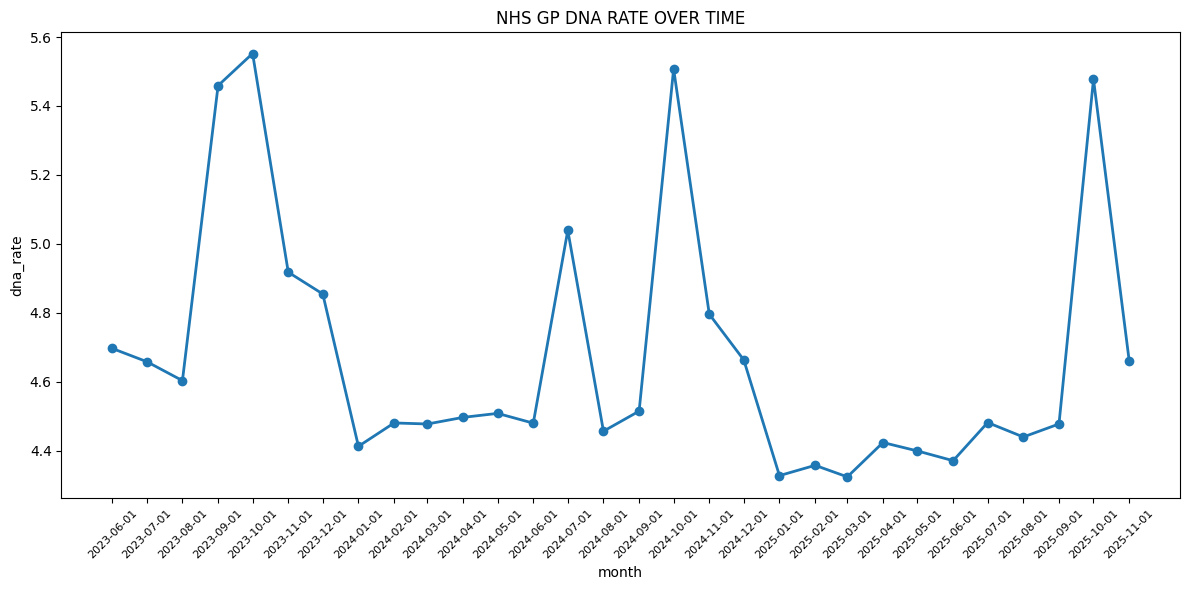

In [68]:
plt.figure(figsize=(12,6))
plt.plot(monthly_dna_rate.index, monthly_dna_rate.values, marker = "o", linewidth = 2)
plt.title("NHS GP DNA RATE OVER TIME")
plt.xlabel("month")
plt.ylabel("dna_rate")
plt.xticks(monthly_dna_rate.index, rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

Figure 1: NHS GP Appointment DNA Rate Over Time (June 2023 - November 2025)
The line chart reveals a clear seasonal pattern in DNA rates across the 30-month period. Key observations:
1. Seasonal Peaks: DNA rates consistently spike to 5.2-5.5% during September-October each year, confirming Autumn as the highest-risk period for missed appointments.
2. Seasonal Troughs: DNA rates drop to 4.3-4.5% during December-January, representing the lowest-risk months.
3. Recurring Pattern: The same seasonal cycle repeats across 2023, 2024, and 2025, indicating this is a predictable, systemic pattern rather than random variation.
4. Range: Overall DNA rates fluctuate within a 1.2 percentage point band (4.3% to 5.5%), which translates to approximately 300,000+ additional missed appointments during peak months.
Implication: NHS intervention efforts (reminders, overbooking strategies) should intensify during September-October to address the predictable Autumn spike in no-shows.

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
dna_rate_sorted = monthly_dna_rate.sort_index()

decomposition = seasonal_decompose(dna_rate_sorted, model="additive", period = 12)

decomposition

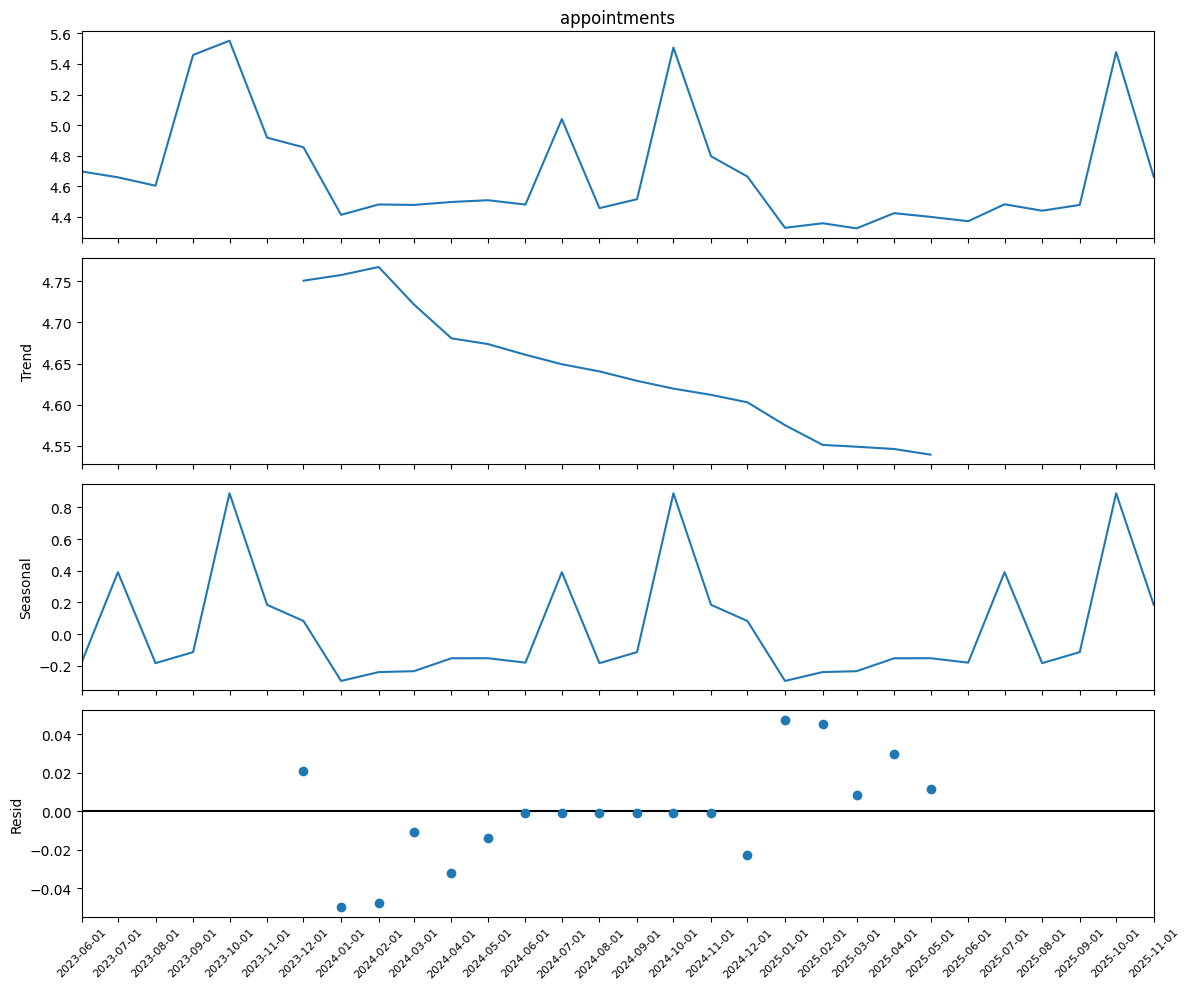

In [71]:
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.xticks(monthly_dna_rate.index, rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

Seasonal Decomposition Analysis
The decomposition reveals three key insights:

Positive Trend: DNA rates are gradually declining (~0.2% improvement over 30 months), suggesting NHS efforts may be working.
Strong Seasonality: Autumn adds ~0.8 percentage points to DNA rates, confirming October as the highest-risk month. This seasonal effect is consistent and predictable.
Low Residuals: Most variation is explained by trend and seasonality, indicating these are the primary drivers of DNA rate changes.

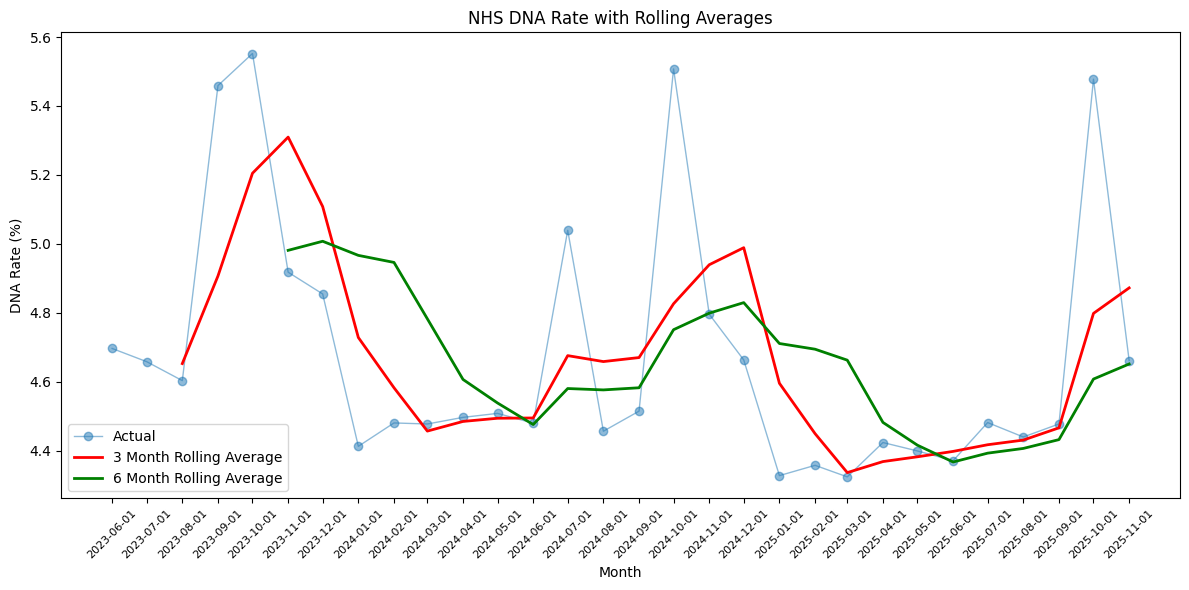

In [72]:
plt.figure(figsize=(12, 6))

plt.plot(dna_rate_sorted.index, dna_rate_sorted.values, marker = "o", linewidth=1, alpha=0.5, label="Actual")

rolling_3 = dna_rate_sorted.rolling(window=3).mean()
plt.plot(rolling_3.index, rolling_3.values, linewidth=2, color = "Red", label="3 Month Rolling Average")

rolling_6 = dna_rate_sorted.rolling(window=6).mean()
plt.plot(rolling_6.index, rolling_6.values, linewidth=2, color = "Green", label="6 Month Rolling Average")

plt.title('NHS DNA Rate with Rolling Averages')
plt.xlabel('Month')
plt.ylabel('DNA Rate (%)')
plt.legend()
plt.xticks(monthly_dna_rate.index,rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

Figure 3: NHS DNA Rate with 3-Month and 6-Month Rolling Averages
Rolling averages were applied to smooth short-term fluctuations and reveal underlying patterns.
Key Findings:

Seasonal Pattern Confirmed: The 3-month rolling average (red) preserves the October spikes, proving the Autumn increase is a genuine recurring pattern - not random noise.
Downward Trend: The 6-month rolling average (green) shows DNA rates gradually declining from ~5.0% in late 2023 to ~4.5% in late 2025 - a positive sign that NHS performance is improving.
Predictable Cycles: Three distinct annual cycles are visible, with peaks occurring consistently in Q4 (September-October) each year.

Implication: The combination of improving trend and predictable seasonality suggests NHS intervention strategies should focus resources on Autumn months while continuing current improvement efforts year-round.

In [73]:
yearly_comparison = dna_rate_sorted.reset_index()
yearly_comparison.columns = ["date", "dna_rate"]
yearly_comparison["year"] = yearly_comparison["date"].dt.year
yearly_comparison["month"] = yearly_comparison["date"].dt.month

In [74]:
yearly_comparison.head()

,date,dna_rate,year,month
0,2023-06-01,4.696558,2023,6
1,2023-07-01,4.658293,2023,7
2,2023-08-01,4.603281,2023,8
3,2023-09-01,5.459047,2023,9
4,2023-10-01,5.552156,2023,10


In [75]:
pivot_yearly = yearly_comparison.pivot(index = "month", columns="year", values = "dna_rate")
print(pivot_yearly)

year       2023      2024      2025
month                              
1           NaN  4.412710  4.327720
2           NaN  4.480514  4.357585
3           NaN  4.477478  4.324080
4           NaN  4.496695  4.423714
5           NaN  4.508230  4.399225
6      4.696558  4.479889  4.371014
7      4.658293  5.039197  4.481643
8      4.603281  4.456539  4.439776
9      5.459047  4.514750  4.477564
10     5.552156  5.507416  5.477619
11     4.917751  4.795975  4.661563
12     4.854641  4.663208       NaN


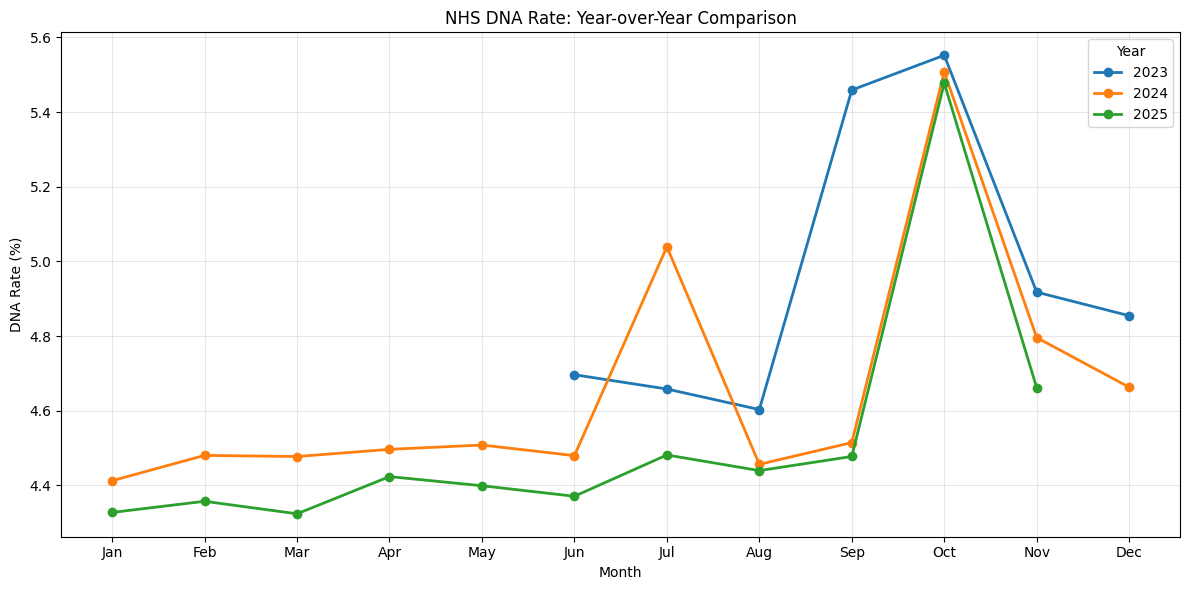

In [76]:
# plot months across year

plt.figure(figsize = (12,6))

for year in pivot_yearly.columns:
  plt.plot(pivot_yearly.index, pivot_yearly[year], marker="o", linewidth = 2, label= str(year))

plt.title("NHS DNA Rate: Year-over-Year Comparison")
plt.xlabel('Month')
plt.ylabel('DNA Rate (%)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Figure 4: NHS DNA Rate Year-over-Year Comparison (2023-2025)
This chart compares monthly DNA rates across three years to identify recurring patterns and year-on-year trends.
Findings:

Consistent October Peak: All three years show DNA rates spiking to ~5.5% in October, confirming this as a predictable, structural pattern.
Steady Improvement: 2025 (green) consistently runs below 2023 (blue) and 2024 (orange), showing approximately 0.2-0.3 percentage points improvement year-over-year.
Repeating Seasonal Shape: All years follow the same curve - low in winter/spring, rising through summer, peaking in autumn, then declining.
Anomaly Identified: July 2024 shows an unusual spike not present in other years, suggesting a one-time event worth investigating.

Conclusion: The seasonal pattern is reliable and predictable across years, making targeted October interventions a high-value strategy. The year-on-year improvement trend indicates current NHS efforts are having a positive effect.

In [77]:
# DNA Rate by HCP Type (Bar Chart)

total_appointment_hcp = nhs_df.groupby("hcp_type")["appointments"].sum()
dna_hcp_appt =nhs_df[nhs_df["appt_status"]== "DNA"].groupby("hcp_type")["appointments"].sum()

hcp_dna_rate = (dna_hcp_appt/total_appointment_hcp) * 100

hcp_dna_rate

,appointments
hcp_type,
GP,3.166920
Other Practice staff,6.150021
Unknown,1.730262


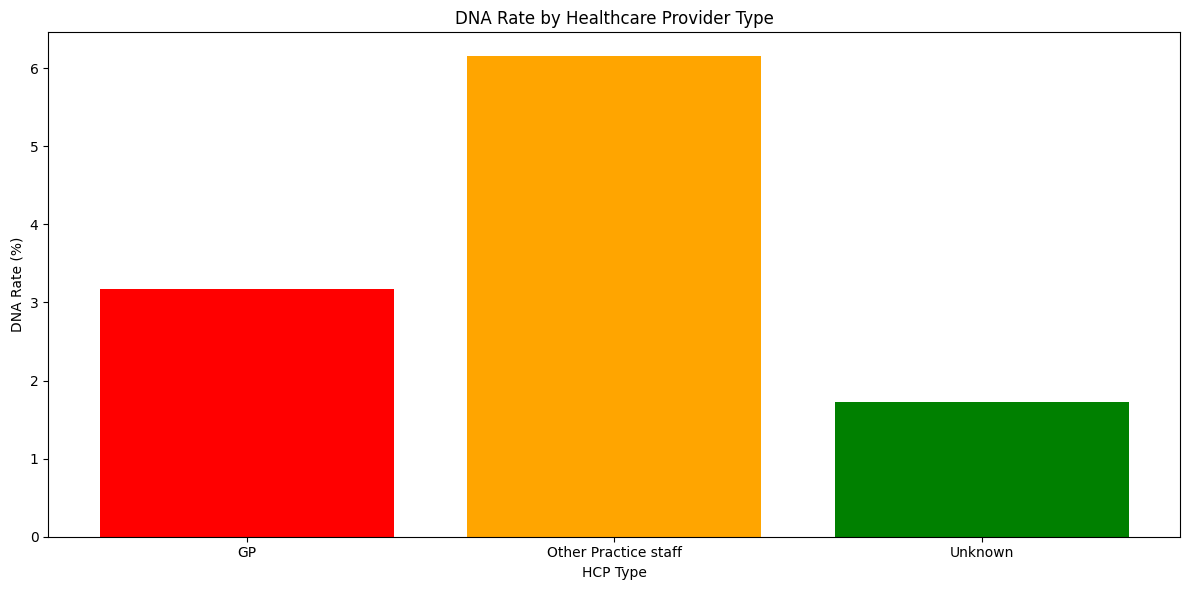

In [78]:
# plotting bar chart for result

plt.figure(figsize=(12, 6))

plt.bar(hcp_dna_rate.index, hcp_dna_rate.values, color= ["red", "orange", "green"])
plt.title('DNA Rate by Healthcare Provider Type')
plt.xlabel('HCP Type')
plt.ylabel('DNA Rate (%)')
plt.tight_layout()
plt.show()

Figure 5: DNA Rate by Healthcare Provider Type
Bar chart comparison reveals significant variation in DNA rates across provider types.
Findings:

Other Practice staff: 6.2% DNA rate (highest)
GP: 3.2% DNA rate
Unknown: 1.7% DNA rate (lowest)

Insight: Appointments with Other Practice staff are nearly twice as likely to result in no-shows compared to GP appointments. This may reflect differences in perceived appointment importance, patient relationships, or booking practices.
Recommendation: Prioritize reminder interventions for appointments with Other Practice staff to maximize impact on reducing no-shows.

In [79]:
# calculate DNA rates by combinations

import seaborn as sns

In [80]:
combo_total = nhs_df.groupby(["hcp_type", "appt_mode"])["appointments"].sum().unstack()

In [81]:
combo_total

appt_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video Conference/Online
hcp_type,,,,,
GP,235916407,3777548,129506015,1176927,22266150
Other Practice staff,335935228,4664072,89769889,1415225,21712579
Unknown,2571822,435214,1914527,14014120,955466


In [82]:
combo_dna = nhs_df[nhs_df["appt_status"]=="DNA"].groupby(["hcp_type", "appt_mode"])["appointments"].sum().unstack()
combo_dna

appt_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video Conference/Online
hcp_type,,,,,
GP,9543928,85401,2652204,41607,111551
Other Practice staff,24029304,145914,3504670,90918,119356
Unknown,26288,17416,46012,254047,406


In [83]:
combo_rate = (combo_dna/combo_total) * 100

combo_rate

appt_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video Conference/Online
hcp_type,,,,,
GP,4.045470,2.260752,2.047939,3.535224,0.500989
Other Practice staff,7.152957,3.128468,3.904060,6.424279,0.549709
Unknown,1.022155,4.001710,2.403309,1.812793,0.042492


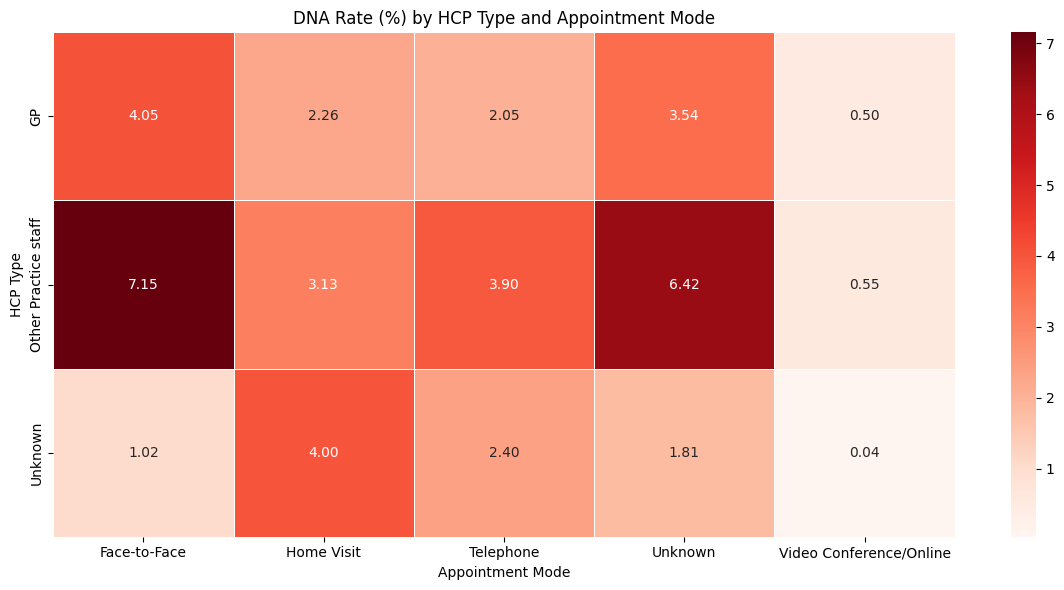

In [84]:
plt.figure(figsize=(12,6))
sns.heatmap(combo_rate,annot=True,fmt='.2f', cmap='Reds', linewidths=0.5)
plt.title('DNA Rate (%) by HCP Type and Appointment Mode')
plt.xlabel('Appointment Mode')
plt.ylabel('HCP Type')
plt.tight_layout()
plt.show()

Figure 6: DNA Rate Heatmap - HCP Type × Appointment Mode
The heatmap identifies specific high-risk combinations:
Highest Risk:

Other Practice staff + Face-to-Face: 7.15% (darkest cell)
Other Practice staff + Unknown: 6.42%

Lowest Risk:

Video Conference across all HCP types: 0.04% - 0.55%

Recommendation:

Target "Other Practice staff + Face-to-Face" appointments with enhanced reminders
Promote Video Conference appointments where clinically appropriate
Investigate why Video has such low DNA rates - patient convenience? Better reminders?




In [85]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments,day_of_week,season,dna_rate_change,month_since_start,Risk_level
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10,Monday,Spring,0.004292,10,low_risk
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293,Monday,Spring,0.004292,10,low_risk
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096,Monday,Spring,0.004292,10,low_risk
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098,Monday,Spring,0.004292,10,low_risk
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854,Monday,Spring,0.004292,10,low_risk


In [86]:
# how much does each appt_mode cost the NHS in missed appointments

appt_mode_dna = nhs_df[nhs_df['appt_status']=="DNA"].groupby("appt_mode")["appointments"].sum()

cost_per_DNA = 30

financial_loss = (appt_mode_dna * cost_per_DNA).sort_values(ascending=False)

financial_loss.item=["appt_mode", "financial_loss"]

In [87]:
financial_loss

,appointments
appt_mode,
Face-to-Face,1007985600
Telephone,186086580
Unknown,11597160
Home Visit,7461930
Video Conference/Online,6939390


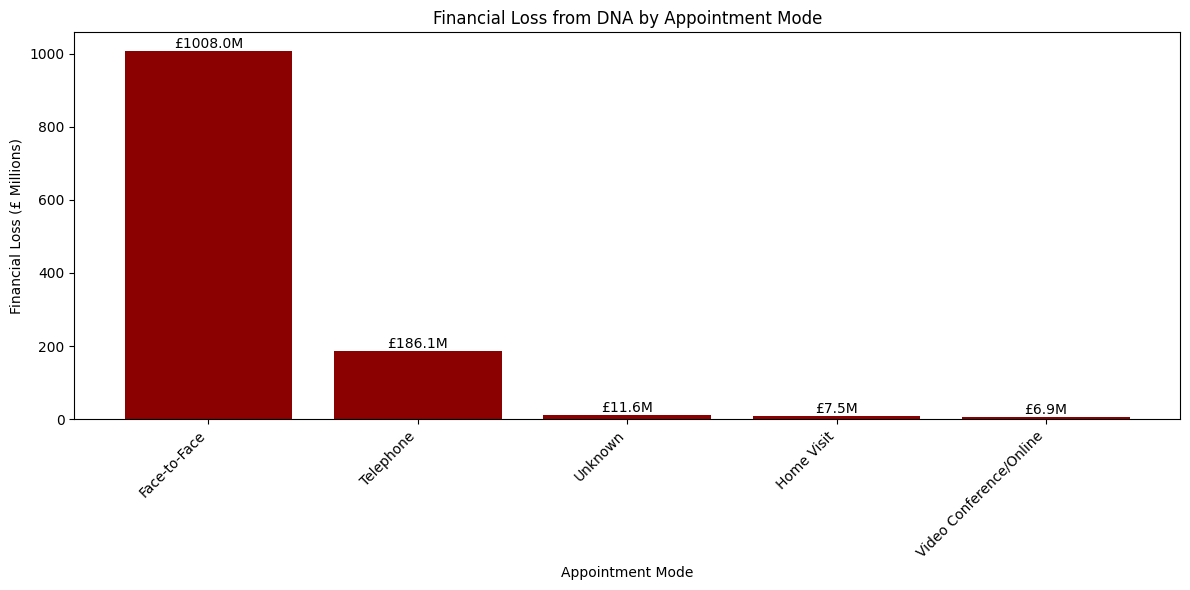

In [88]:
# create a bar chart

plt.figure(figsize=(12,6))
bars = plt.bar(financial_loss.index, financial_loss.values/1_000_000, color = "darkred")
plt.title('Financial Loss from DNA by Appointment Mode')
plt.xlabel('Appointment Mode')
plt.ylabel('Financial Loss (£ Millions)')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'£{height:.1f}M', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Figure 7: Financial Loss from DNA by Appointment Mode
Face-to-Face appointments account for £1,008M in annual losses - 83% of all DNA-related costs.
Key Findings:

Face-to-Face: £1,008M (dominant loss driver)
Telephone: £186M (distant second)
Video Conference: £6.9M (minimal loss)

Recommendation: Even a modest 10% reduction in Face-to-Face DNA rates would save over £100M annually. Strategies could include shifting suitable appointments to Video Conference, or implementing targeted reminder systems for Face-to-Face bookings.

In [89]:
# Top 10 Highest-Risk Combinations (%)

total_combo = nhs_df.groupby(["hcp_type", "appt_mode", "season"])["appointments"].sum()
dna_combo = nhs_df[nhs_df["appt_status"]=="DNA"].groupby(["hcp_type", "appt_mode", "season"])["appointments"].sum()

risk_rate_combo = (dna_combo/total_combo) * 100

top_10_worst = risk_rate_combo.sort_values(ascending=False).head(10)



In [90]:
top_10_worst

hcp_type              appt_mode     season
Other Practice staff  Face-to-Face  Autumn    7.611898
                      Unknown       Autumn    7.100017
                      Face-to-Face  Summer    6.971489
                                    winter    6.961871
                                    Spring    6.793291
                      Unknown       Spring    6.392836
                                    Summer    6.222202
                                    winter    5.761436
Unknown               Home Visit    Summer    5.324558
GP                    Face-to-Face  Autumn    4.428827
Name: appointments, dtype: float64

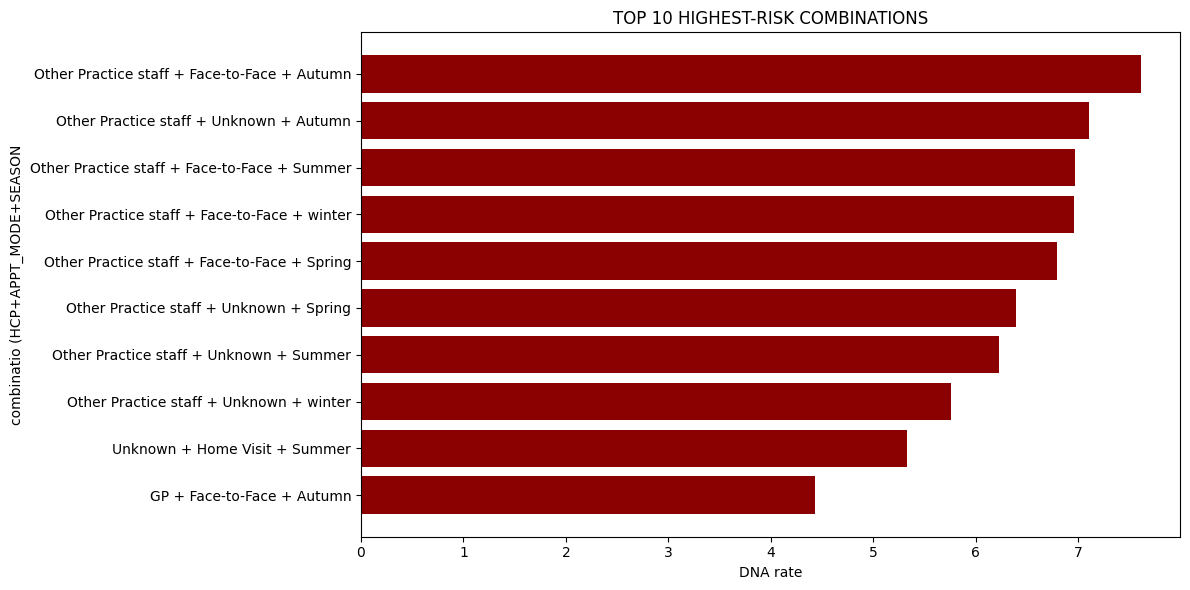

In [91]:
plt.figure(figsize=(12,6))

labels = [f"{fact[0]} + {fact[1]} + {fact[2]}" for fact in top_10_worst.index]

plt.barh(labels, top_10_worst.values, color="darkred")
plt.xlabel("DNA rate")
plt.ylabel("combinatio (HCP+APPT_MODE+SEASON")
plt.title("TOP 10 HIGHEST-RISK COMBINATIONS")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Figure 8: Top 10 Highest-Risk Appointment Combinations
This chart identifies the exact combinations NHS should target for intervention.
Key Findings:

#1 Risk: Other Practice staff + Face-to-Face + Autumn (7.61% DNA rate)
"Other Practice staff" appears in 8 of 10 worst combinations
Face-to-Face mode dominates the high-risk list
Autumn season amplifies risk across all combinations

Actionable Insight: A targeted intervention for "Other Practice staff + Face-to-Face" appointments during Autumn could address the single highest-risk segment, potentially preventing thousands of missed appointments.

In [92]:
nhs_df.head()

,appointment_month,appt_status,hcp_type,appt_mode,service_setting,context_type,national_category,appointments,day_of_week,season,dna_rate_change,month_since_start,Risk_level
0,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,10,Monday,Spring,0.004292,10,low_risk
1,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Home Visit,293,Monday,Spring,0.004292,10,low_risk
2,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Care Related Encounter but does not fit into a...,1096,Monday,Spring,0.004292,10,low_risk
3,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,Clinical Triage,3098,Monday,Spring,0.004292,10,low_risk
4,2024-04-01,Attended,GP,Face-to-Face,Extended Access Provision,Care Related Encounter,General Consultation Acute,15854,Monday,Spring,0.004292,10,low_risk


features to us for ML

- appt_mode
- hcp_type
- season
- service_setting
- context_type
- months_since_start
- dna_rate_change
- risk_level
- appt_status (target value)

bad features
- national_category
- appointment_month
- appointments

In [93]:
# save cleaneed data set

nhs_df.to_csv("nhs_cleaned_with_features.csv", index=False)

In [101]:
nhs_df.shape

(33574, 13)

In [100]:
from google.colab import files

files.download("nhs_cleaned_with_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>